## 04. 자동미분

In [19]:
import torch

### 4-1. requires_grad


In [20]:
x = torch.ones(3, requires_grad=True) # requires_grad=True (자동미분)로 gradient를 계산할 tensor
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [21]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\zer12\AppData\Local\Temp\ipykernel_14192\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [22]:
z = y ** 2
print(z)



tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. backward()
- x -> y -> z 계산에서 역전파를 통해 기울기를 구함

In [23]:
result = z.sum()
result.backward()

In [24]:
print(z)
print(x.grad)


tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3. no_grad()
- 역전파를 중지

In [28]:
x = torch.tensor(1.0, requires_grad=True)
y = x ** 2
print(x.requires_grad)

with torch.no_grad():
    y = (x ** 2)
    print(x.requires_grad)
    print(y.requires_grad)


True
True
False


## 4-4. detach()

In [29]:
y.detach()

tensor(1.)

In [38]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.9 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.0 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.0 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 1.8 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.0 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.0 MB 1.8 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.0 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/

Epoch [50 / 400], loss:  3.7848
Epoch [100 / 400], loss:  3.7807
Epoch [150 / 400], loss:  3.7782
Epoch [200 / 400], loss:  3.7767
Epoch [250 / 400], loss:  3.7758
Epoch [300 / 400], loss:  3.7752
Epoch [350 / 400], loss:  3.7749
Epoch [400 / 400], loss:  3.7747


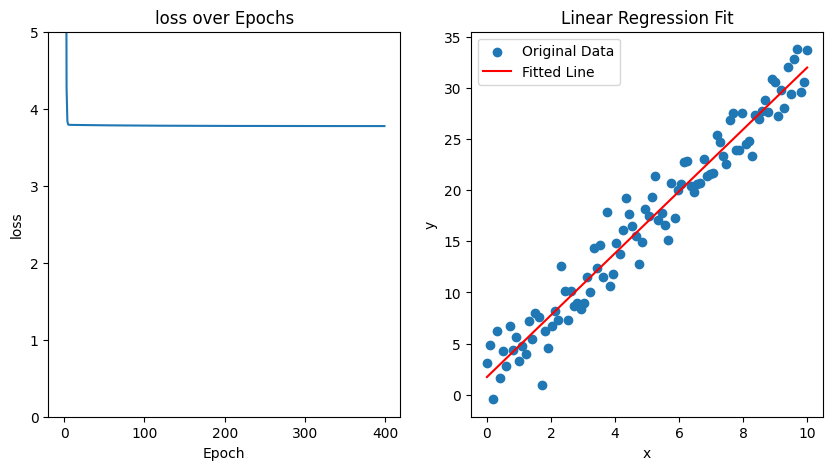

Model paramters
linear.weight : tensor([[3.0254]])
linear.bias : tensor([1.7271])


In [44]:
# 선형회귀 연습
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 입출력 정희
x = torch.linspace(0,10,100).view(-1,1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100,1) * 2


# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1) # 입력 1개 출력1개
    
    def forward(self, x): # forward : 순전파
        return self.linear(x)
    
model = LinearRegressionModel()


# 3. 손실함수 정의
# 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
# lr = Learning rate
optimizer = optim.SGD(model.parameters(),lr=0.01) # SGD: 확률적 경사하강법 lr : 러닝메이트

# 5. 학습 반복
epochs = 400
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 한번 돌릴때마다 초기화 (기울기 초기화) 
    outputs = model(x) # 예측값 계산
    loss = loss_function(outputs, y) # outputs과y(결과) 비교, 손실계산
    loss.backward() #역전파
    optimizer.step() #가중치 업데이트

    losses.append(loss.item()) # 손실값 저장

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}], loss: {loss.item() : .4f}")

# 6. 결과 시각화
plt.figure(figsize=(10,5))

#손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title("loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("loss")

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color ='red' ,label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model paramters")
for name, param in model.named_parameters():
    print(f"{name} : {param.data}")

